# Cek GPU

In [ ]:
!nvidia-smi

Thu Jun  6 15:07:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install YOLO

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


# Import packages

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Row Segmentation

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="IuC4lkOiV9Hzhqczop6A")
project = rf.workspace("crypts-project").project("row-segmentation")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 978.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Row-Segmentation-1 in yolov8:: 100%|██████████| 540/540 [00:00<00:00, 1873.04it/s]


## Custom Training

## 10 Epoch

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Row-Segmentation-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, v

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels_correlogram.jpg  train_batch0.jpg
BoxF1_curve.png					    labels.jpg		    train_batch1.jpg
BoxP_curve.png					    MaskF1_curve.png	    train_batch2.jpg
BoxPR_curve.png					    MaskP_curve.png	    val_batch0_labels.jpg
BoxR_curve.png					    MaskPR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			    MaskR_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				    results.csv		    val_batch1_pred.jpg
events.out.tfevents.1717686761.5f1a00bd5c49.1887.0  results.png		    weights


/content


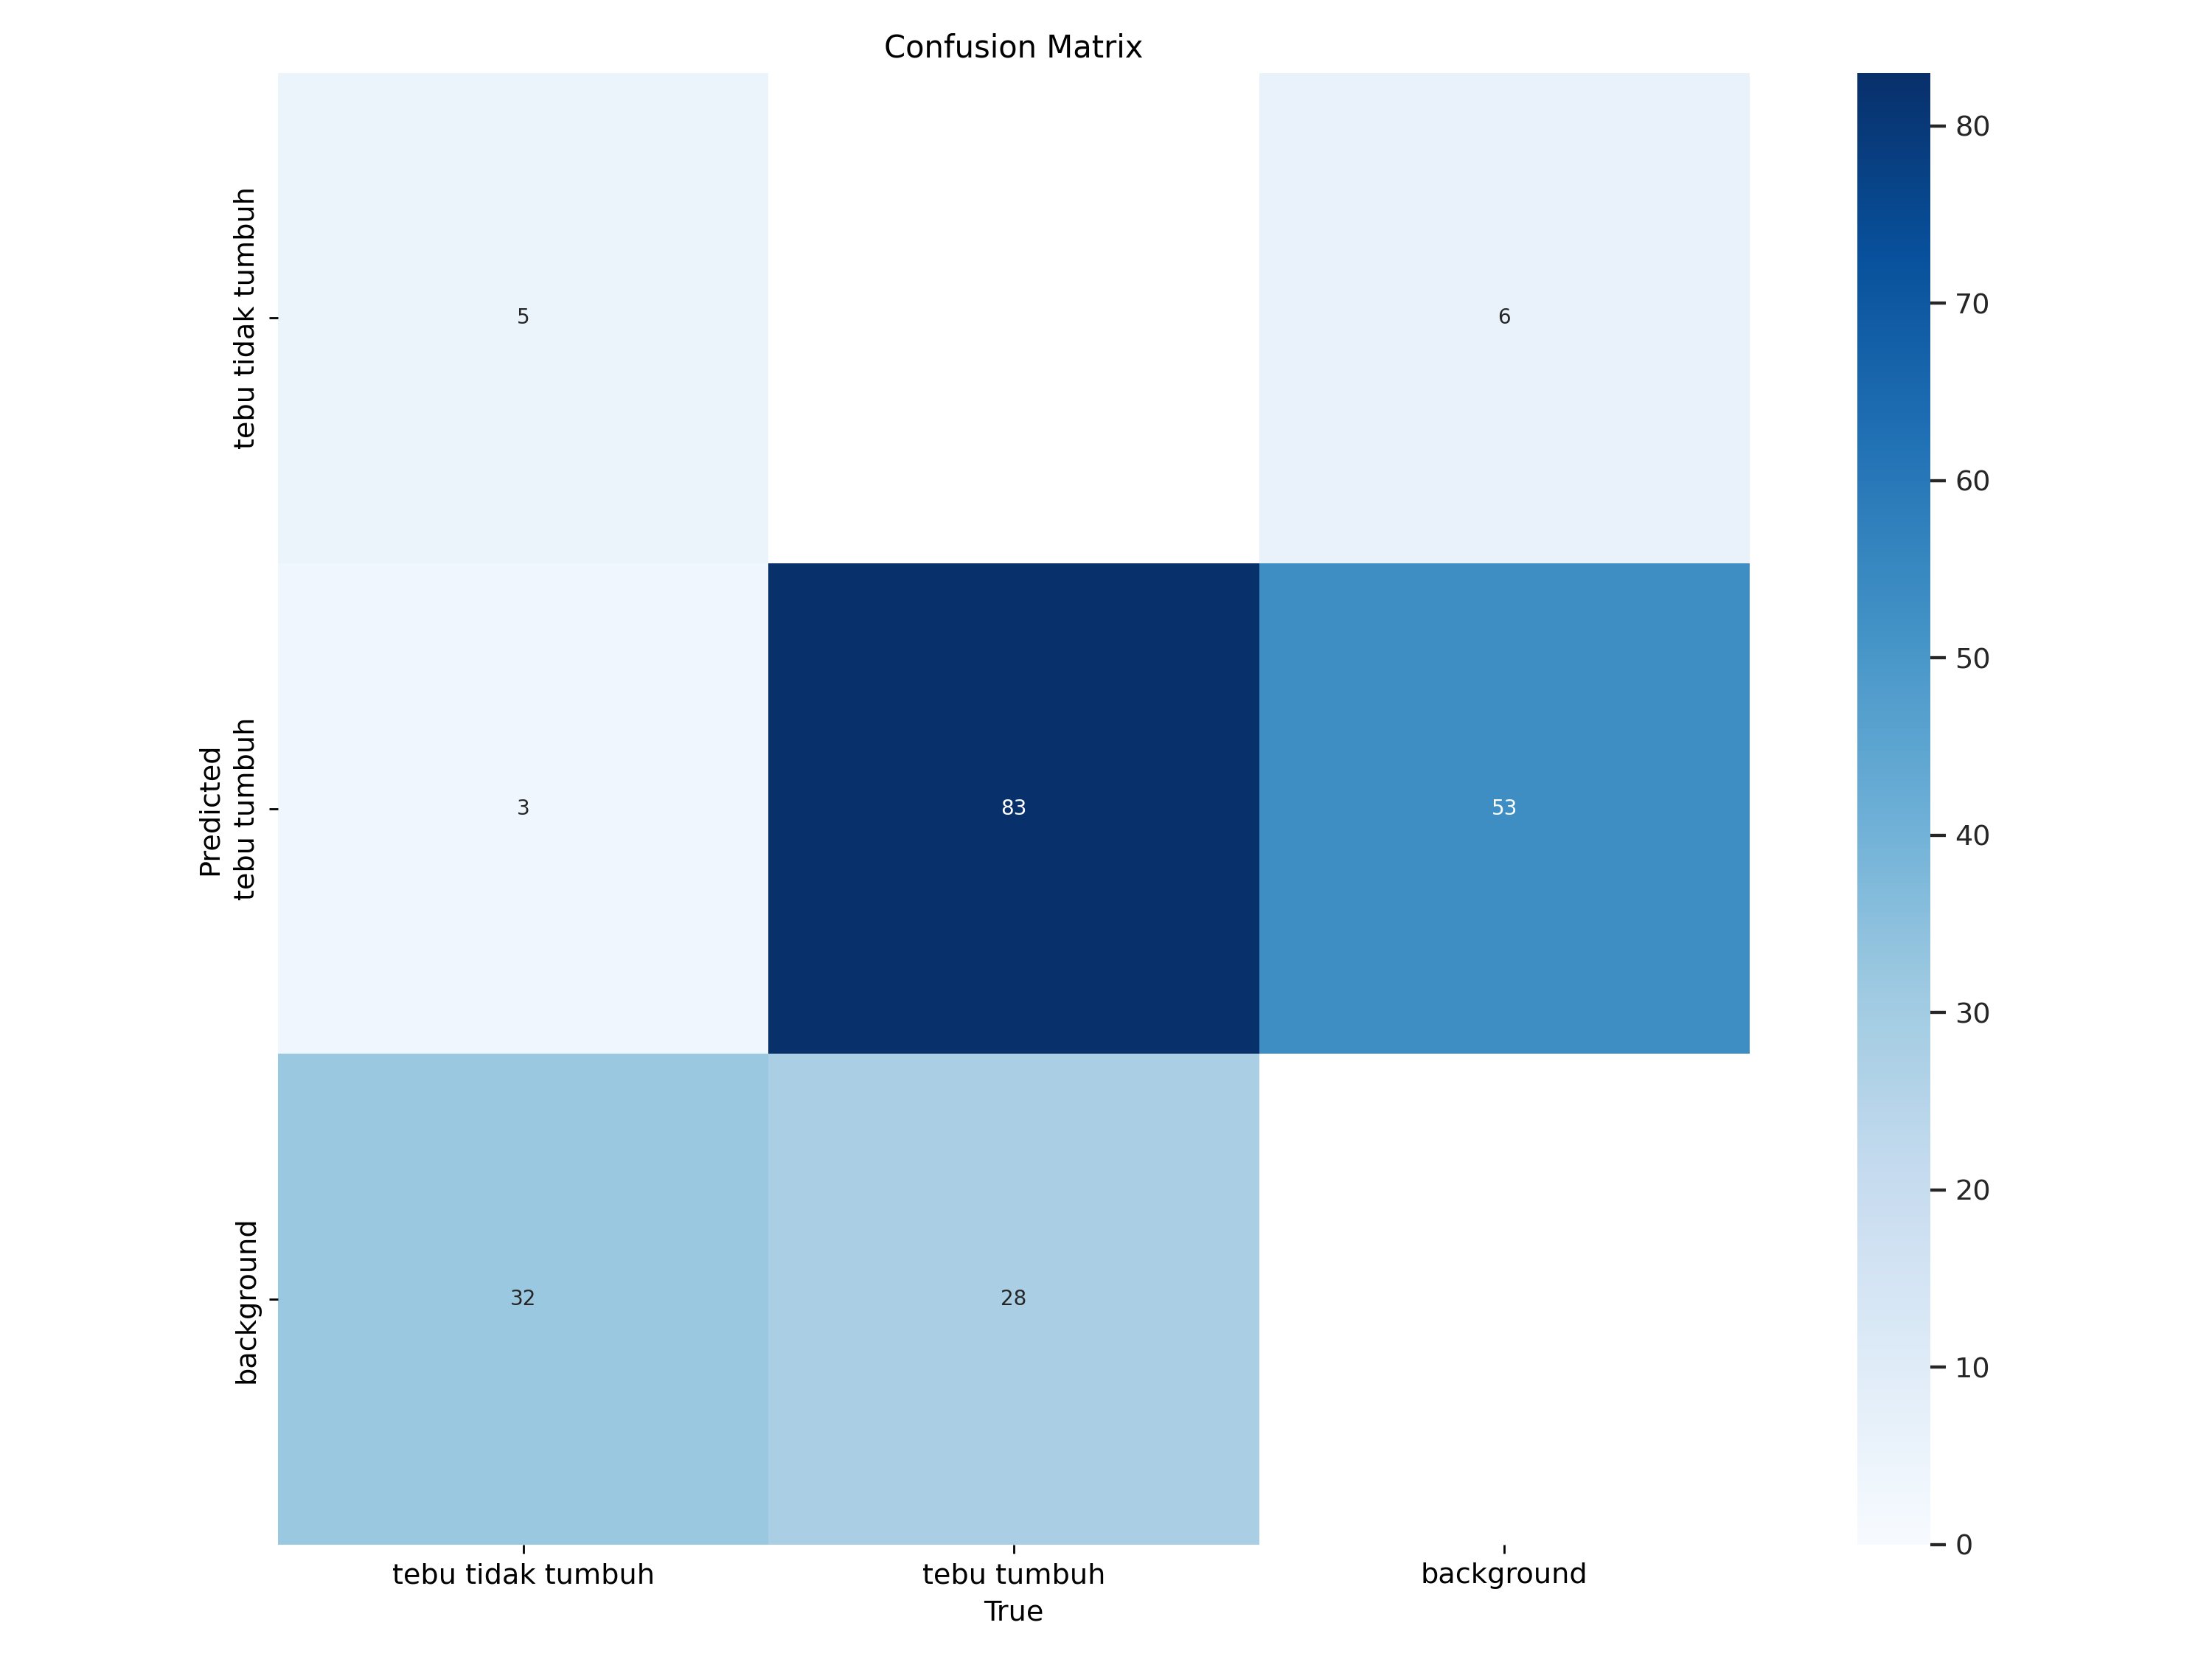

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


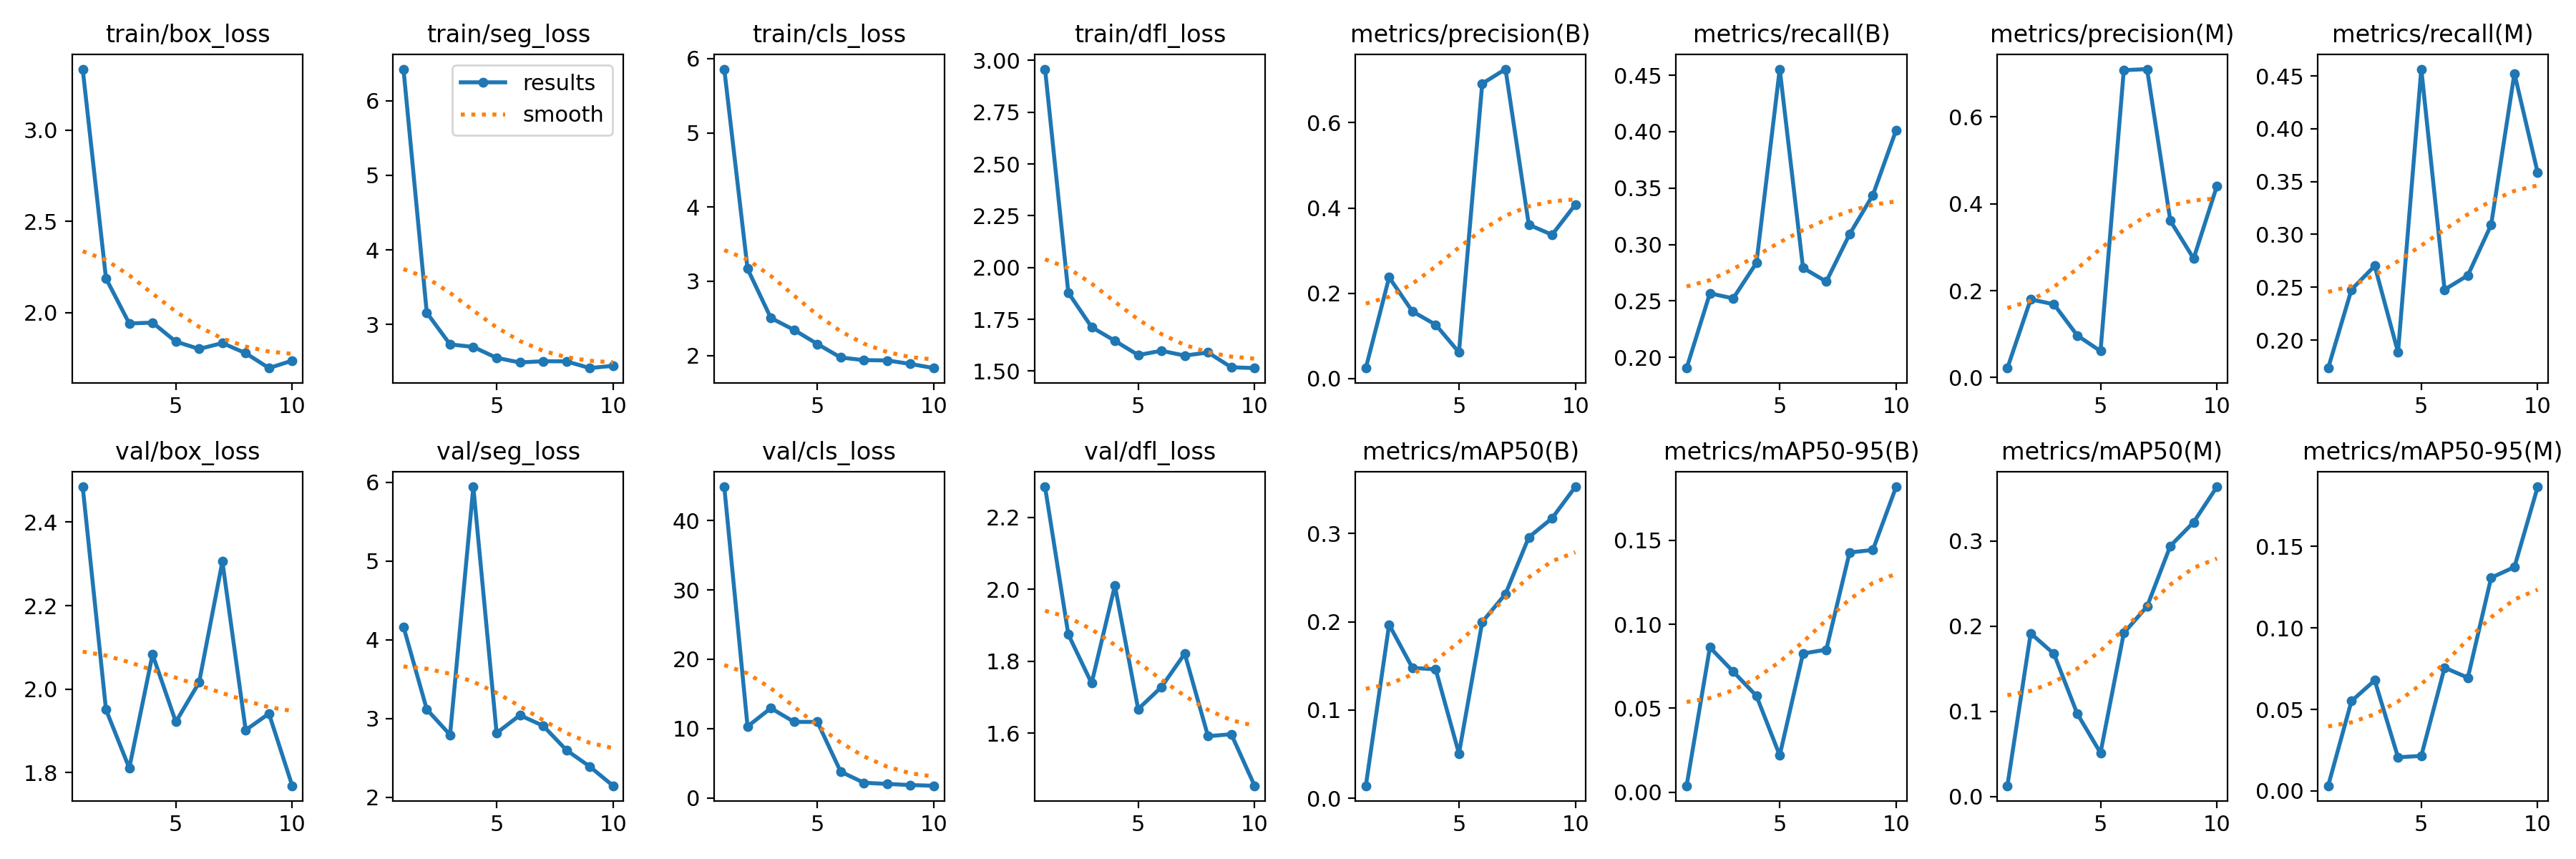

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


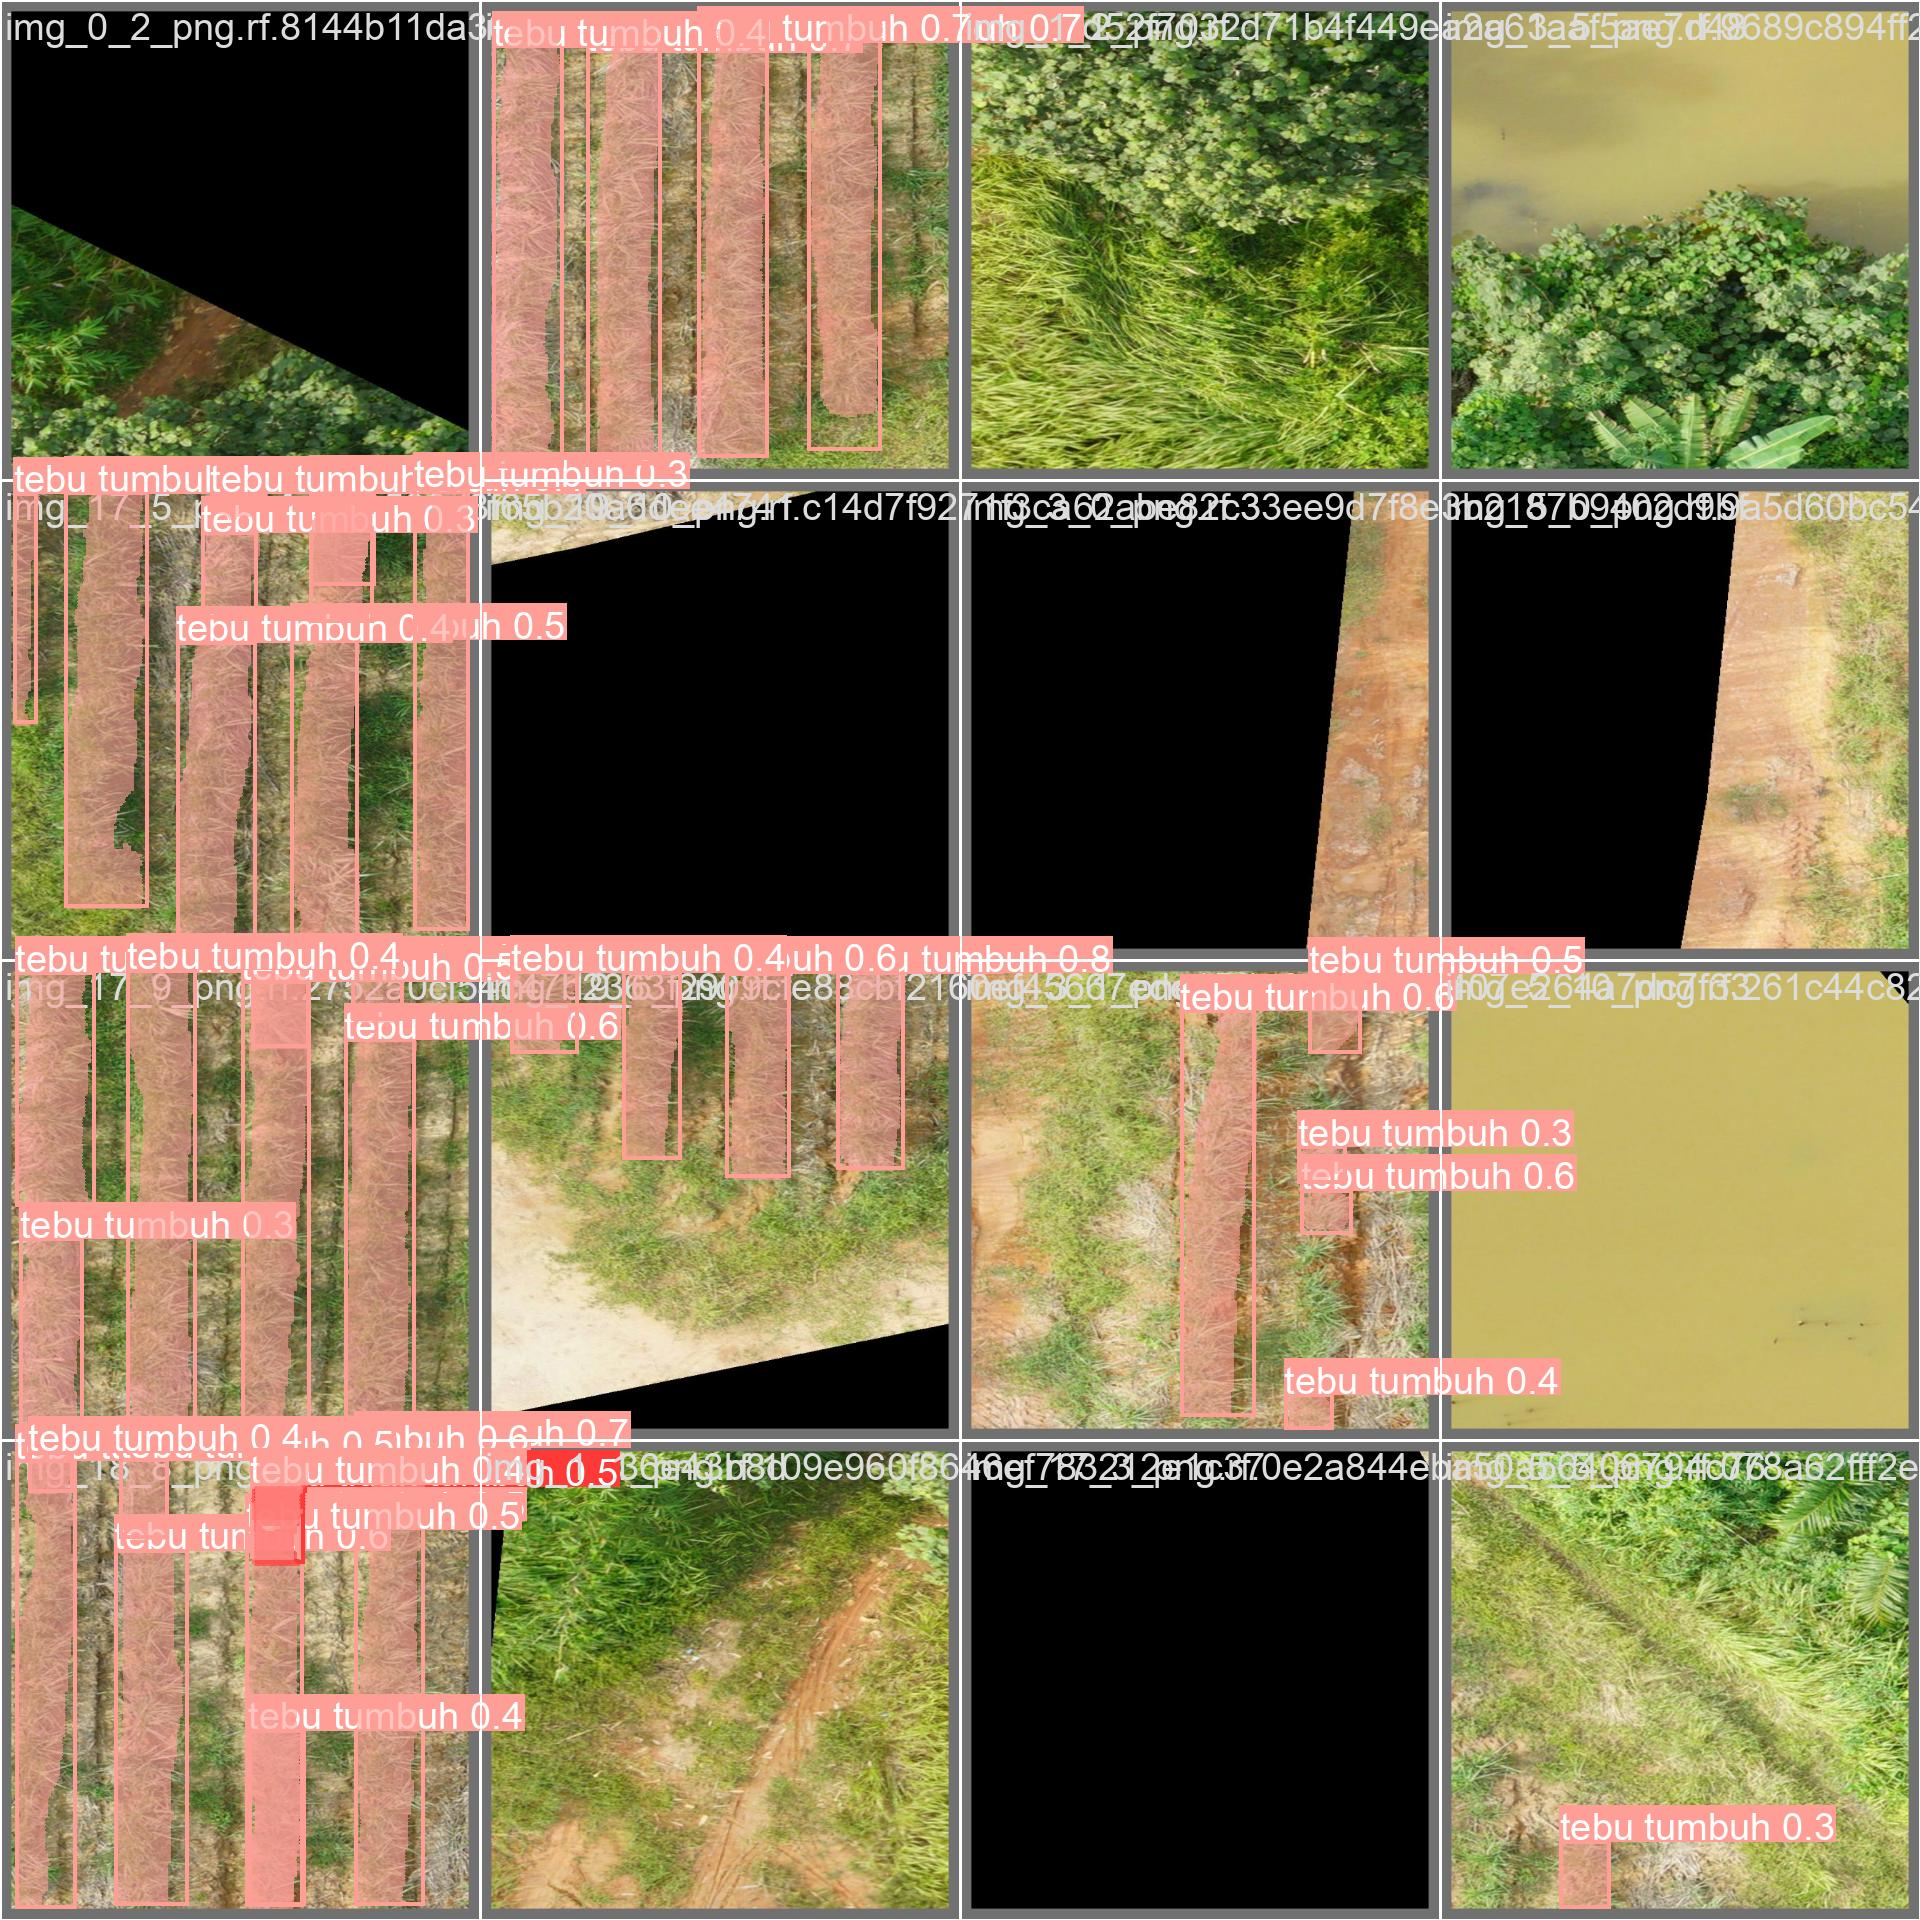

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Row-Segmentation-1/valid/labels.cache... 52 images, 28 backgrounds, 0 corrupt: 100% 52/52 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.19s/it]
                   all         52        151      0.408      0.401      0.353      0.183      0.441      0.358      0.363      0.185
     tebu tidak tumbuh         52         40      0.339        0.1     0.0887     0.0254      0.308       0.05      0.067     0.0231
           tebu tumbuh         52        111      0.476      0.703      0.617       0.34      0.574      0.667       0.66      0.347
Speed: 9.2ms preprocess, 30.8ms inference, 0.0ms loss, 14.5ms postprocess per image
Results saved to runs/segm

# Save model to drive

In [ ]:
!mv /content/runs/segment/train/weights/best.pt /content/drive/MyDrive/Weed_Detection/Models

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/26 /content/datasets/Row-Segmentation-1/test/images/img_0_0_png.rf.11158c52e0864bb729e6b9496fa8a358.jpg: 640x640 (no detections), 20.9ms
image 2/26 /content/datasets/Row-Segmentation-1/test/images/img_10_0_png.rf.bf58fdac2103e5b5fd804530b16e2432.jpg: 640x640 1 tebu tumbuh, 20.9ms
image 3/26 /content/datasets/Row-Segmentation-1/test/images/img_11_13_png.rf.bf244512b8de3510a84fe486f70c336c.jpg: 640x640 (no detections), 21.0ms
image 4/26 /content/datasets/Row-Segmentation-1/test/images/img_11_15_png.rf.e44dfbdb32fd9d5b01ec20204945fda5.jpg: 640x640 (no detections), 20.9ms
image 5/26 /content/datasets/Row-Segmentation-1/test/images/img_12_3_png.rf.c5b511096af22fa70925508019ca6ab8.jpg: 640x640 6 tebu tumbuhs, 20.9ms
image 6/26 /content/datasets/Row-Segmentation-1/test/images/img_12_8_png.rf.147c0331c6a

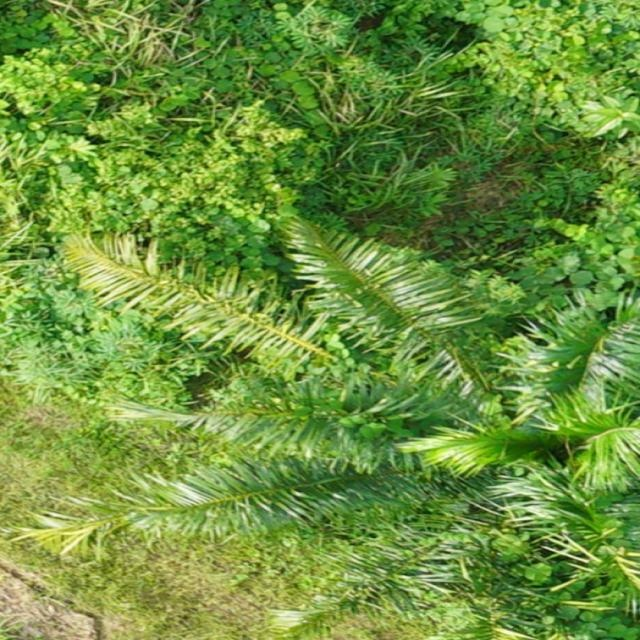

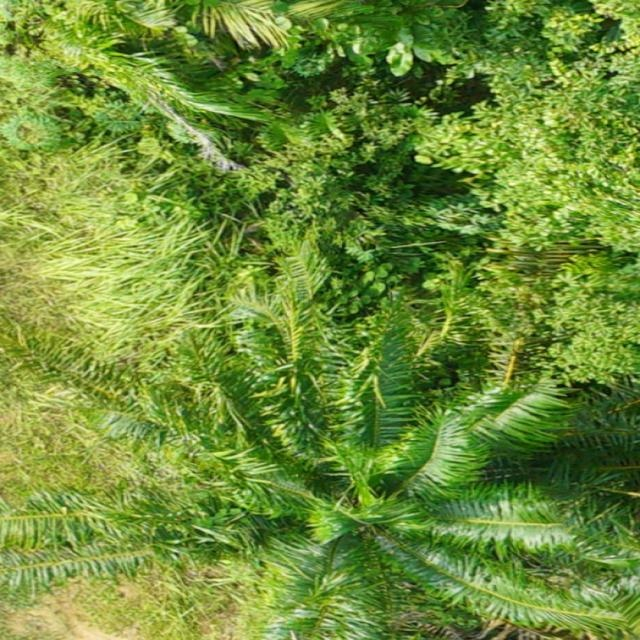

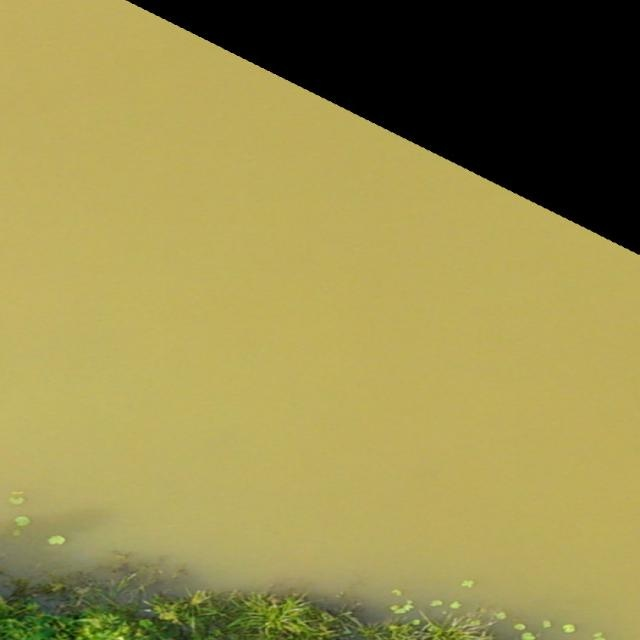

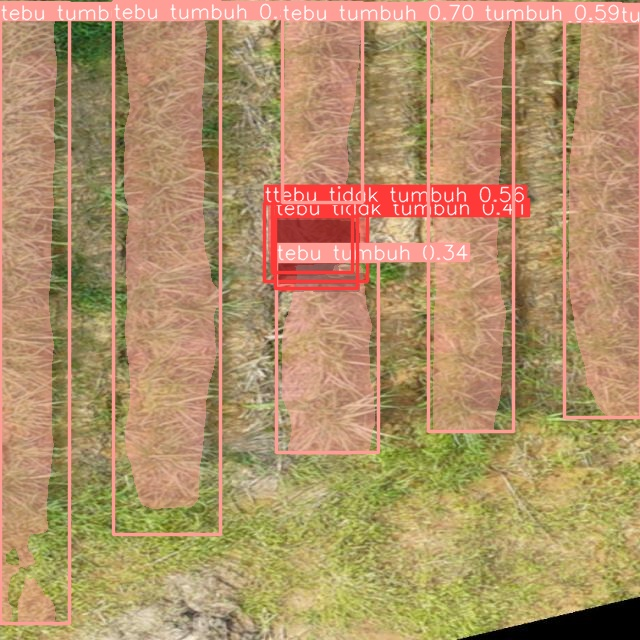

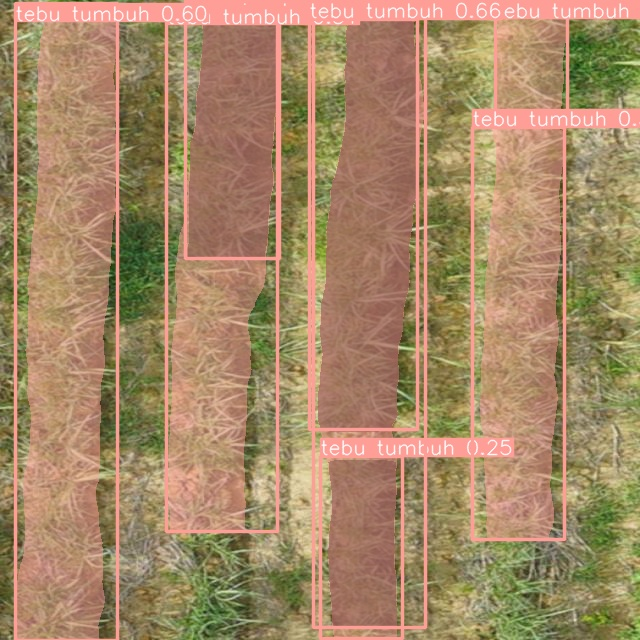

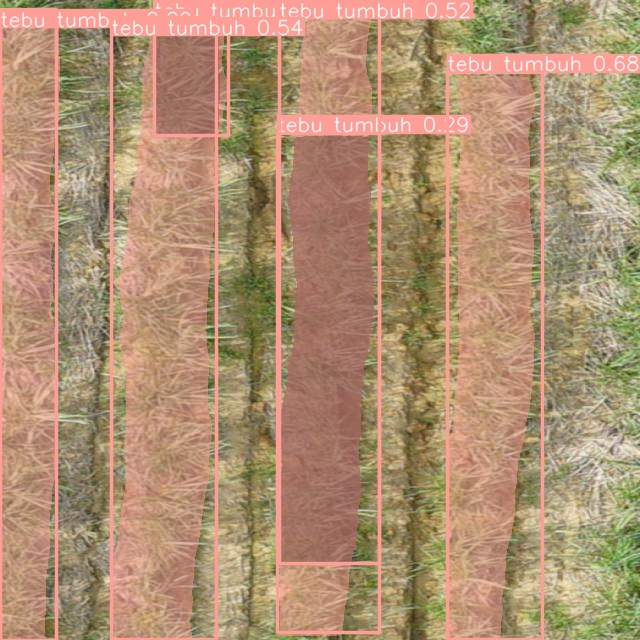

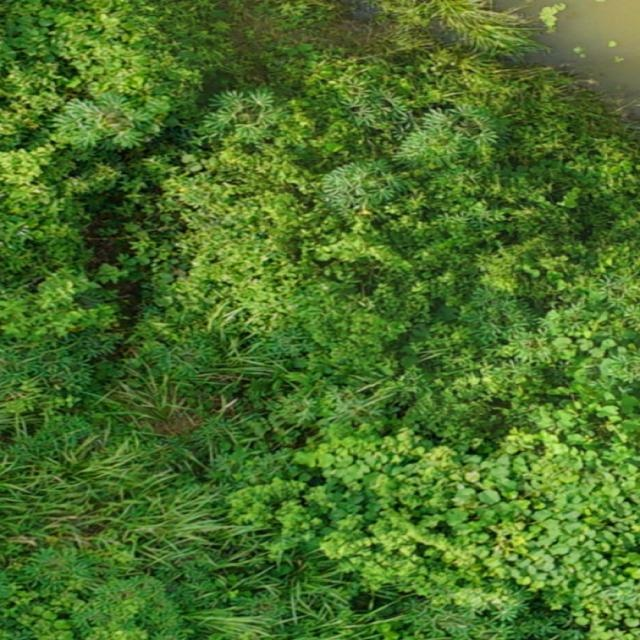

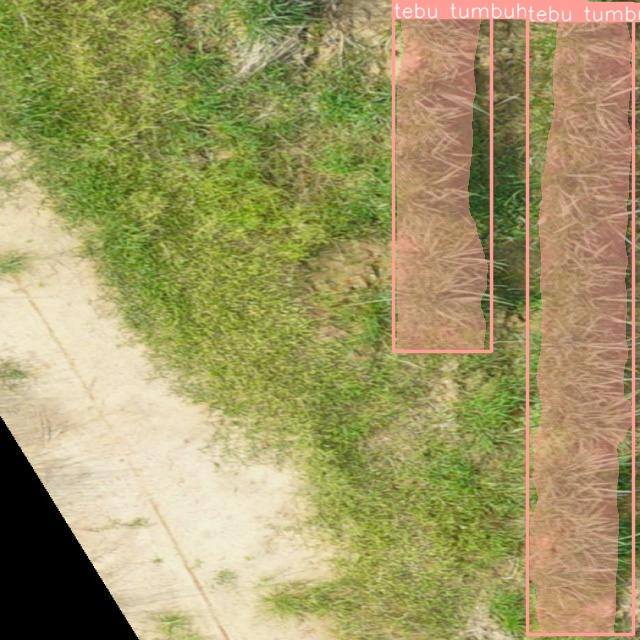

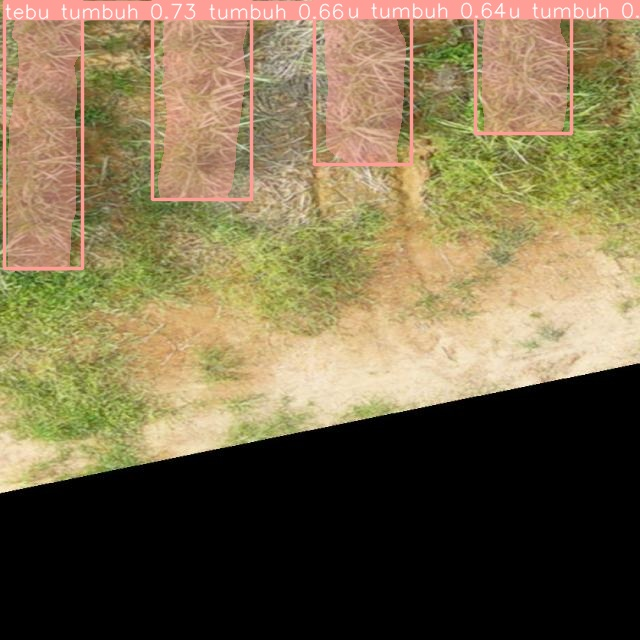

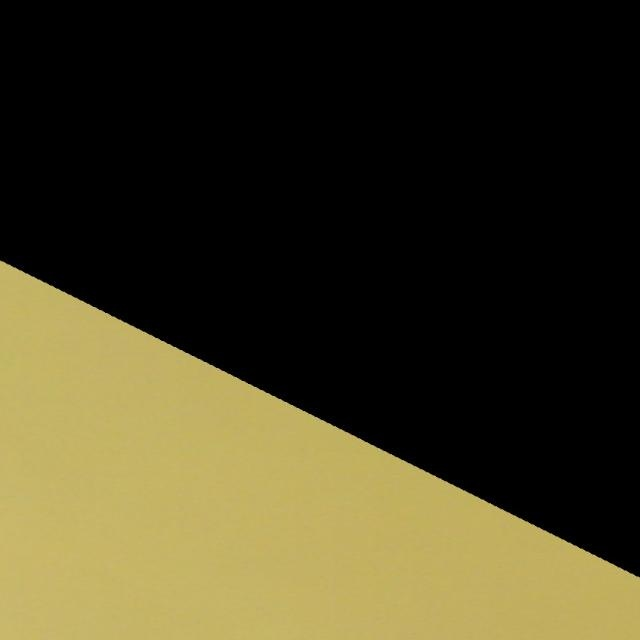

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Test raw large image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Weed_Detection/Dataset/19022024_KND_GBL_1A-4.jpg' save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/drive/MyDrive/Weed_Detection/Dataset/19022024_KND_GBL_1A-4.jpg: 640x416 (no detections), 97.2ms
Speed: 2.9ms preprocess, 97.2ms inference, 40.7ms postprocess per image at shape (1, 3, 640, 416)
Results saved to runs/segment/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict3/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!mv /content/runs/segment/predict2 /content/drive/MyDrive/Weed_Detection/row_predict/

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/52 /content/datasets/Row-Segmentation-1/valid/images/img_0_2_png.rf.8144b11da36d1bfd14532f6e9d5daad0.jpg: 640x640 (no detections), 20.6ms
image 2/52 /content/datasets/Row-Segmentation-1/valid/images/img_0_3_png.rf.8117f482a1d1a548d5a022c9b4f76c03.jpg: 640x640 (no detections), 20.5ms
image 3/52 /content/datasets/Row-Segmentation-1/valid/images/img_10_15_png.rf.ad9aec52977187c865ed2f1485566d55.jpg: 640x640 (no detections), 20.5ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 4/52 /content/datasets/Row-Segmentation-1/valid/images/img_11_12_png.rf.9a72c64606e1236a72a62b1041447f49.jpg: 640x640 2 tebu tumbuhs, 20.5ms
image 5/52 /content/datasets/Row-Segmentation-1/valid/images/img_11_1_png.rf.e446750e0288a34a2b9aa2b35d3bb9fc.jpg: 640x640 7 tebu tumbuhs, 20.5ms
image 6/52 /content/datasets/Row-Segment

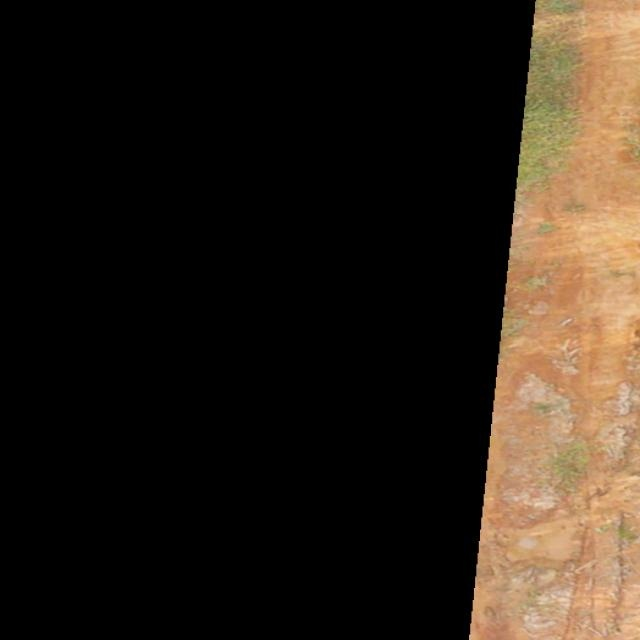

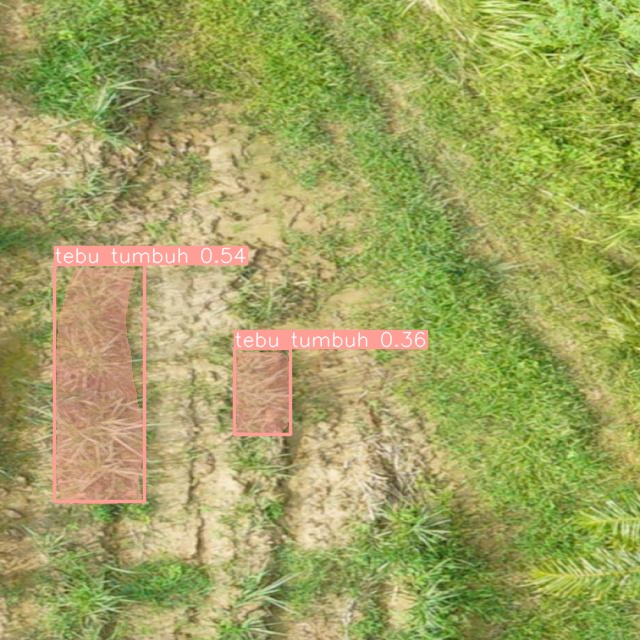

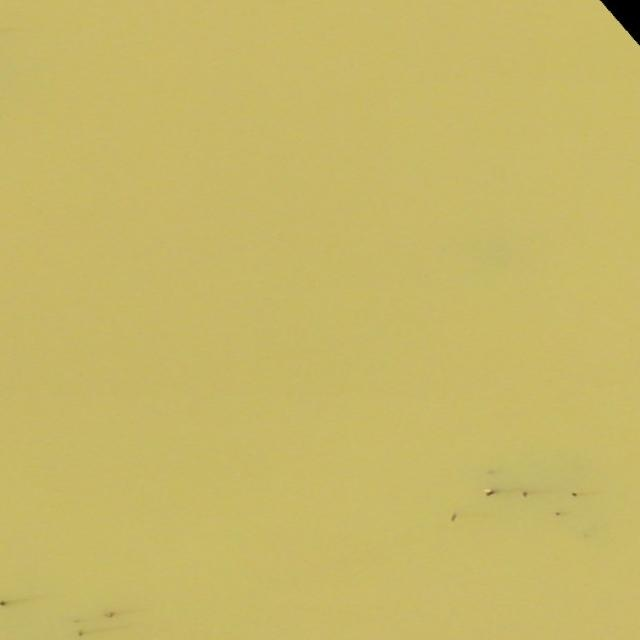

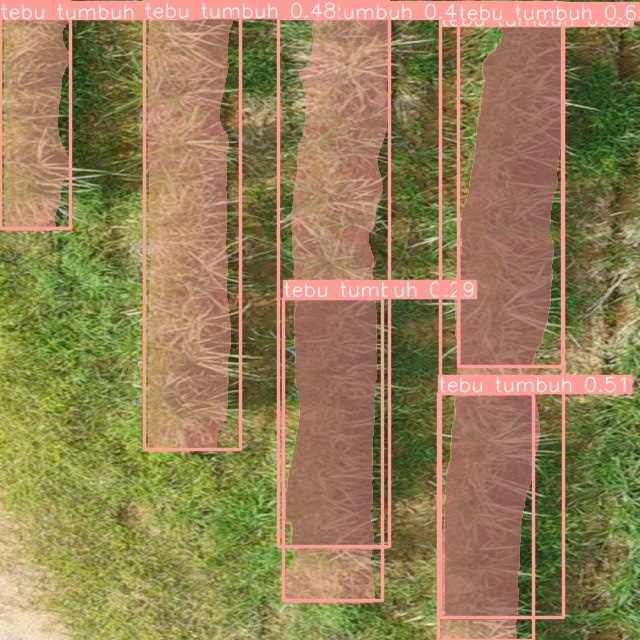

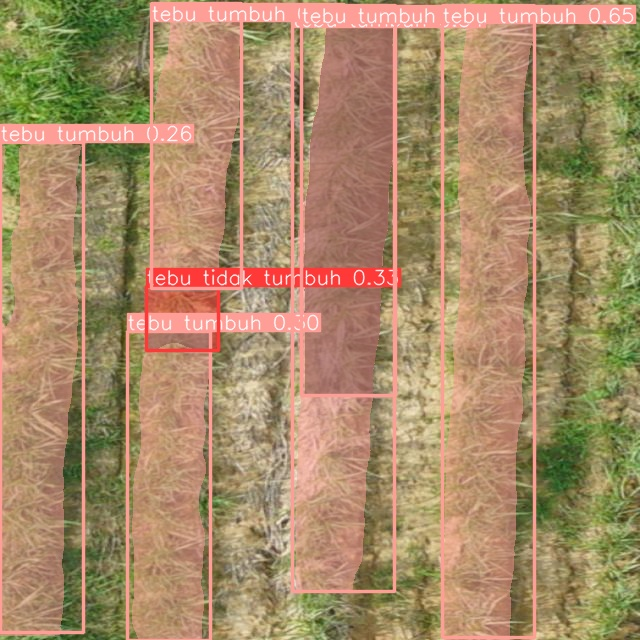

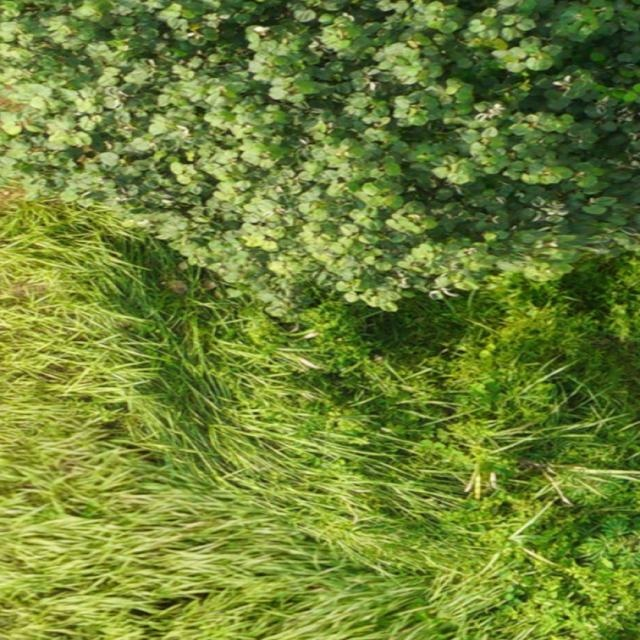

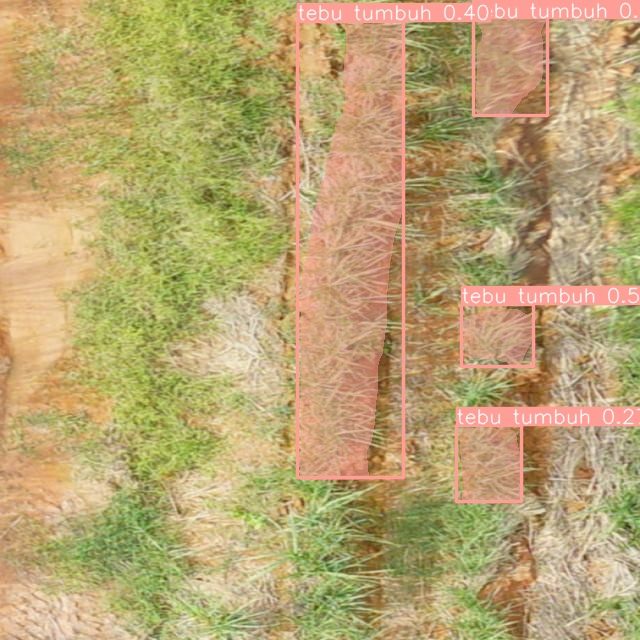

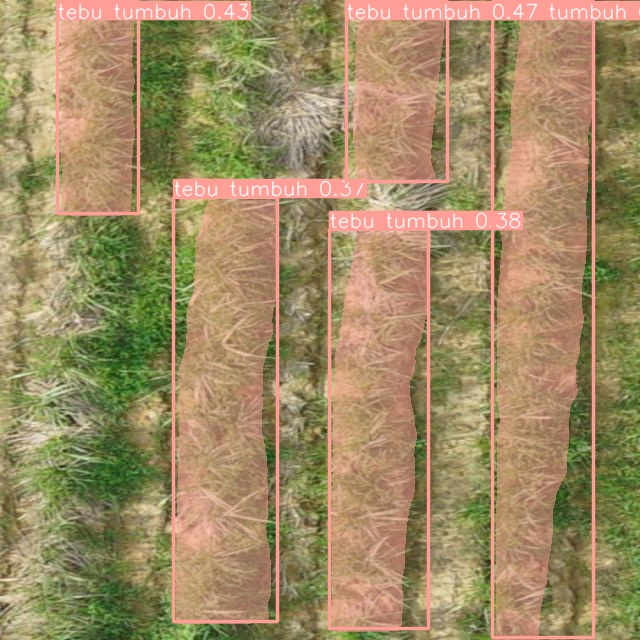

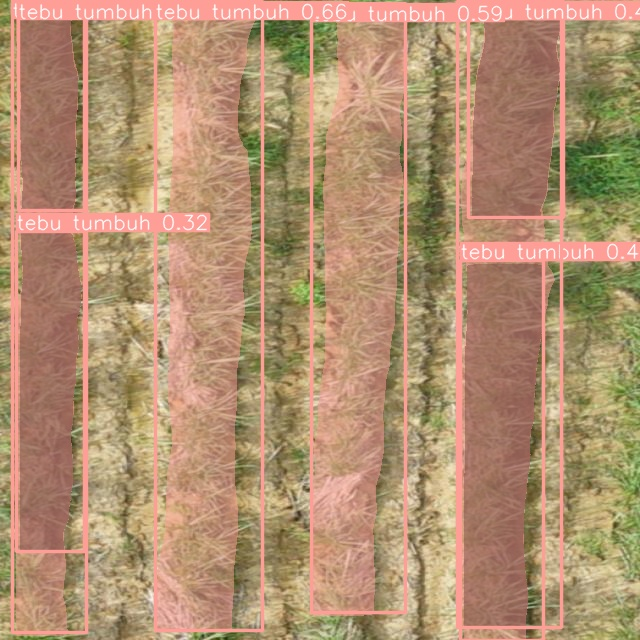

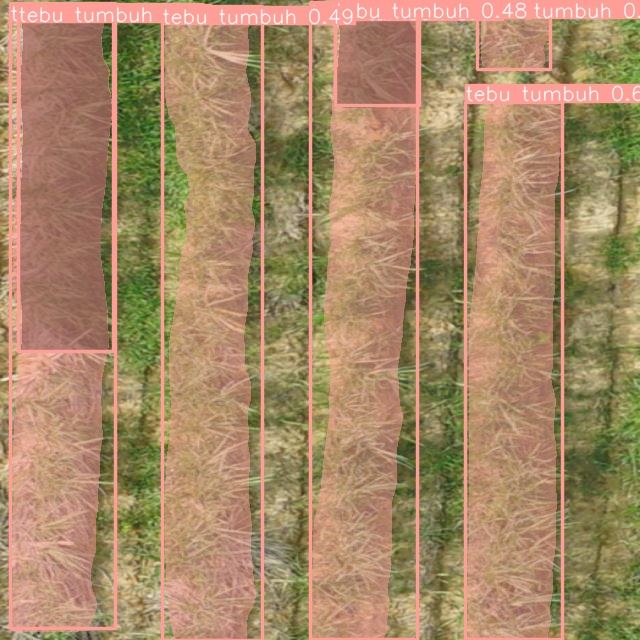

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!mv /content/runs/segment/predict_52images /content/drive/MyDrive/Weed_Detection/row_predict/

In [ ]:
%cd {HOME}

/content


# Row Segment

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Load Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="IuC4lkOiV9Hzhqczop6A")
# project = rf.workspace("crypts-project").project("weed-detection-3db4v")
# version = project.version(1)
# dataset = version.download("yolov8")

# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IuC4lkOiV9Hzhqczop6A")
project = rf.workspace("crypts-project").project("row-segmentation")
version = project.version(1)
dataset = version.download("yolov8")

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")